# Analyze and Reason on Multimodal Data with Gemini: Challenge Lab

## GSP524

## Challenge Scenario

#### Cymbal Direct: Analyzing Social Media Engagement for a New Product Launch

Cymbal Direct just launched a new line of athletic apparel designed for enhanced performance during various activities. To gauge public perception and potential market impact, Cymbal Direct is tasked with analyzing social media engagement across multiple platforms. This analysis will involve:
  * **Text**: Analyzing customer reviews and social media posts for sentiment and key themes.
  * **Image**: Analyzing images posted by influencers and customers wearing the apparel to identify style trends and usage patterns.
  * **Audio** Analyzing an audio clip of a podcast episode of a recent interview about Cymbal Direct's new product launch.

The goal is to provide Cymbal Direct with actionable insights to refine their marketing strategy, improve their products, and bolster product positioning. Are you ready for the challenge?

## Task 1. Import libraries and install the Gen AI SDK

In this section, you will import the libraries required for this lab and install the Google Gen AI SDK.

**All cells have been written for you in this section. There are no `#TODOs` required.**

### Install Google Gen AI SDK for Python

In [2]:
%pip install --upgrade --quiet google-genai

Note: you may need to restart the kernel to use updated packages.


### Restart current runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which will restart the current kernel.

In [3]:
# Restart kernel after installs so that your environment can access the new packages
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

### Import Libraries

In [3]:
from IPython.display import HTML, Markdown, display
from google import genai
from google.genai import types
from google.genai.types import (
    FunctionDeclaration,
    GenerateContentConfig,
    GoogleSearch,
    MediaResolution,
    Part,
    Retrieval,
    SafetySetting,
    Tool,
    ToolCodeExecution,
    ThinkingConfig,
    GenerateContentResponse,
    GenerateContentConfig,    
    VertexAISearch,
)
from collections.abc import Iterator
import os

### Set Google Cloud project information and initialize Google Gen AI SDK

In [4]:
import os
os.makedirs('analysis', exist_ok=True)

PROJECT_ID = os.environ.get("GOOGLE_CLOUD_PROJECT")
LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")
print(f"Project ID: {PROJECT_ID}")
print(f"LOCATION: {LOCATION}")

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

Project ID: qwiklabs-gcp-04-b8dbe7557d3c
LOCATION: us-central1


### Load the Gemini 2.0 Flash model

Learn more about all [Gemini models on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models#gemini-models).

In [10]:
MODEL_ID = "gemini-2.0-flash-001"  # @param {type: "string"}

## Task 2. Analyze and reason on customer feedback (text)

In this task, you'll use the Gemini 2.0 Flash and Gemini-2.5-flash models to analyze customer reviews and social media posts in text format about Cymbal Direct's new athletic apparel. You will save the findings from the model into a markdown file that you will use for a comprehensive report in the last task.

**Your tasks will be labeled with a `#TODO` section in the cell. Read each cell carefully and ensure you are filling them out correctly!**

###  Load and preview the text data
This file contains customer reviews and social media posts about Cymbal Direct's new athletic apparel line, collected from various e-commerce platforms and social media sites. The data is in raw text format, with each review or post separated by a newline.

In [11]:
# Load and preview the text data (reviews.txt)
!gcloud storage cp gs://{PROJECT_ID}-bucket/media/text/reviews.txt media/text/reviews.txt
!head media/text/reviews.txt

Copying gs://qwiklabs-gcp-04-b8dbe7557d3c-bucket/media/text/reviews.txt to file://media/text/reviews.txt
  Completed files 1/1 | 3.3kiB/3.3kiB                                          
Reviews & Posts:

1. @FitnessFanaticKate (Twitter): Obsessed with the new Cymbal Direct leggings! The fabric is so soft and supportive. Finally, a legging that doesn't slip during my runs! #CymbalDirect #Activewear #LeggingsLove

2. Amazon Review (5 Stars): "Bought the 'Pulse' running shorts. Lightweight, breathable, and dries quickly. Exactly what I needed for summer workouts!"

3. @GymRatGary (Instagram): Cymbal Direct's new line is…okay. Nothing groundbreaking, but the 'Endure' t-shirt is decent quality for the price. #CymbalDirect #GymLife #FitnessApparel

4. Facebook Post (Sarah Miller): "Anyone else try the new Cymbal Direct stuff? I got the 'Flow' yoga pants, and they're a little too tight around the waistband, even though I ordered my usual size. Disappointed. 😕"



### Initial Analysis with Gemini 2.0 Flash
For this section, you will need to fill out the `#TODOs` for **Construct the prompt for Gemini** and **Send the prompt to Gemini**.

In [12]:
# 1. Load the text data (reviews.txt)
with open('media/text/reviews.txt', 'r') as f:
    text_data = f.read()



# 2. Construct the prompt for Gemini
# TODO: Write a prompt that instructs the Gemini model to analyze the customer reviews and social media posts.
# The prompt should include clear instructions to:
# - Identify the overall sentiment (positive, negative, or neutral) of each review or post.
# - Extract key themes and topics discussed, such as product quality, fit, style, customer service, and pricing.
# - Identify any frequently mentioned product names or specific features.
prompt = f"""
You are an AI assistant helping to analyze customer feedback about Cymbal Direct's new athletic apparel. 
Carefully analyze the following customer reviews and social media posts. For each review/post:
- Identify the overall sentiment (positive, negative, or neutral).
- Extract key themes and topics mentioned (e.g., product quality, fit, style, customer service, pricing).
- Identify any frequently mentioned product names or specific features.

Here is the feedback text:
{text_data}
"""

# 3. Send the prompt to Gemini
# TODO: Use the `client.models.generate_content` method to send the prompt and text data to the Gemini model.
# TODO: Make sure to specify the `MODEL_ID` and the `prompt` as parameters.
# TODO: Store the response from the model in a variable named `response`.
response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt
)

# 4. Display the response
display(Markdown(response.text))


Okay, here's the analysis of the customer feedback for Cymbal Direct's new athletic apparel, broken down by review/post:

**Analysis of Customer Feedback:**

Here is an organized breakdown of the customer reviews and social media posts, with identified sentiment, key themes, and mentioned product names/features.

| Review/Post # | Sentiment | Key Themes/Topics                                | Product/Feature Mentions                                    |
|--------------|-----------|---------------------------------------------------|------------------------------------------------------------|
| 1            | Positive  | Fabric softness, support, fit, performance (running) | Leggings (general), doesn't slip                         |
| 2            | Positive  | Lightweight, breathability, quick-drying, performance (summer workouts) | 'Pulse' running shorts                                      |
| 3            | Neutral   | Quality, price                                      | 'Endure' t-shirt                                           |
| 4            | Negative  | Fit (sizing), waistband tightness                  | 'Flow' yoga pants                                          |
| 5            | Neutral   | Layering, color options, wrinkles                   | 'Stride' tank top                                          |
| 6            | Negative  | Marketing vs. reality, disappointment               | (General apparel, no specific product)                     |
| 7            | Negative  | Durability, quality, seams, return issues          | 'Power' hoodie                                            |
| 8            | Neutral   | Support, performance (running)                      | Sports bra (general)                                       |
| 9            | Neutral   | Packaging, perceived quality                         | 'Apex' training shorts, cheap feel                          |
| 10           | Positive  | Performance (chilly runs), lightweight, windproof, style | 'Zenith' jacket                                            |
| 11           | Positive  | Comfort, fit, performance (yoga)                  | 'Balance' leggings                                         |
| 12           | Negative  | Color accuracy (online vs. in-person), fit             | 'Velocity' shirt                                           |
| 13           | Neutral   | Range of motion, durability                          | 'Strength' shorts                                          |
| 14           | Neutral   | Sizing (general question)                           | (General apparel, no specific product)                     |
| 15           | Negative  | Sizing chart accuracy                               | (General apparel, sizing)                                  |
| 16           | Positive  | Water resistance, comfort, performance (hiking)      | 'Summit' hiking pants                                       |
| 17           | Positive  | Value, style, functionality                          | 'Energy' tank                                             |
| 18           | Neutral   | Support, restrictiveness, performance (Pilates)      | 'Control' top                                             |
| 19           | Negative  | Customer service (responsiveness)                   | (General return issue, no specific product)                |
| 20           | Positive  | Inclusivity (plus-size), comfort, support, fit, style | 'Empower' collection                                       |

**Summary of Key Themes & Topics:**

*   **Fit & Sizing:** This is a significant area of concern, with several reviews mentioning issues with sizing accuracy, waistband tightness, and overall fit discrepancies compared to size charts. This is the most consistently appearing negative theme.
*   **Quality & Durability:**  Several reviews mention fabric quality, durability (seam ripping, cheap feel), and performance under different activities.  There is a mixed sentiment here, with some praising quality and others finding it lacking.
*   **Performance:** Customers frequently discuss the performance of the apparel during various activities like running, yoga, hiking, and CrossFit, focusing on features like support, breathability, range of motion, and water resistance.
*   **Comfort:** Softness, comfort during workouts, and the feeling of the fabric are frequently mentioned, particularly in positive reviews.
*   **Style/Aesthetics:** Color options, how the apparel looks (flattering, cute, stylish), and how it appears online vs. in person are all mentioned.
*   **Value & Price:** Some reviews comment on the value for the price, with some finding it a good deal and others feeling it's overpriced for the quality.
*   **Customer Service:** One review highlights a negative experience with customer service responsiveness.
*   **Marketing vs. Reality:** One review calls out a discrepancy between the marketing hype and the actual quality of the apparel.
*   **Plus-Size Inclusivity:** One review strongly praises the brand's efforts to cater to plus-size athletes.

**Product-Specific Observations:**

*   **Leggings:** Are generally well-received for softness, support, and staying in place during runs and yoga.
*   **Shorts:** Receive mixed reviews. The 'Pulse' shorts are praised for being lightweight and breathable, while the 'Apex' shorts are described as feeling "cheap."  'Strength' shorts are commended for range of motion but could be tougher.
*   **Tank Tops:** Generally positive, with mentions of good layering options, color options, and suitability for everyday wear.
*   **Jackets:** The 'Zenith' jacket is very well-received for its performance in chilly weather, lightweight feel, and stylish appearance.
*   **Hoodies:** The 'Power' hoodie received a very negative review due to poor durability.
*   **Sizing:** The biggest point of contention.


### Deep Dive with Gemini-2.5-flash Model  

Now that you have generated some insights based on the reviews, you will use the Gemini-2.5-flash model to explore the reviews in more detail, and come up with some takeaways and use reasoning to create actionable insights for your team.

In [13]:
MODEL_ID = "gemini-2.5-flash"  # @param {type: "string"}

### Helper functions

Create methods to print out the thoughts and answer.

In [14]:
def print_thoughts(response: GenerateContentResponse) -> None:
    for part in response.candidates[0].content.parts:
        header = "Thoughts" if part.thought else "Answer"
        display(Markdown(f"""## {header}:\n{part.text}"""))


def print_thoughts_stream(response: Iterator[GenerateContentResponse]) -> None:
    display(Markdown("## Thoughts:\n"))
    answer_shown = False

    for chunk in response:
        for part in chunk.candidates[0].content.parts:
            if not part.thought and not answer_shown:
                display(Markdown("## Answer:\n"))
                answer_shown = True
            display(Markdown(part.text))

### Enable thoughts

You set the flag `include_thoughts` in the `ThinkingConfig` to indicate whether to return thoughts in the model response. The flag is set to `False` by default. You will also set the optional `thinking_budget` parameter in the ThinkingConfig to control and configure how much a model thinks on a given user prompt.

**Hint: you will need to use this for calls to the Thinking model!**

In [15]:
config=types.GenerateContentConfig(thinking_config=types.ThinkingConfig(include_thoughts=True,thinking_budget=1024))

### Deep Dive with Gemini-2.5-flash: Reasoning on Customer Sentiment

In this section, you'll use the Thinking model to delve deeper into the customer sentiment and identify key areas for improvement. We're particularly interested in understanding the reasoning behind positive and negative reviews and uncovering any recurring themes that might not be immediately apparent.

For this section, you will need to fill out the `#TODOs` for **Construct the prompt for Gemini** and **Send the prompt to the Gemini Thinking model**.

In [16]:
# 1. Construct the prompt for Gemini
# TODO: Write a prompt that instructs the Gemini model to analyze the customer reviews and social media posts in more detail.
# The prompt should include clear instructions to:
# - Identify the main factors driving positive and negative sentiment.
# - Assess the overall impact of the new athletic apparel line on brand perception.
# - Identify three key areas where Cymbal Direct can improve customer satisfaction or product offerings.
# - Imagine you are presenting your findings to the Cymbal Direct marketing team and highlight the three most important takeaways.
thinking_mode_prompt = f"""
You are an expert analyst helping Cymbal Direct evaluate customer feedback on their new athletic apparel line. 
Analyze the following customer reviews and social media posts in detail. Specifically:
- Identify the main factors driving both positive and negative sentiment.
- Assess the overall impact of the new athletic apparel line on Cymbal Direct’s brand perception.
- Identify three key areas where Cymbal Direct can improve customer satisfaction or product offerings.
- Imagine you are presenting your findings directly to the Cymbal Direct marketing team. Summarize the three most important takeaways that the team should act on.

Here is the feedback text:
{text_data}
"""

# 2. Send the prompt to the Gemini Thinking model
# TODO: Use the `client.models.generate_content` method to send the prompt and text data to the Gemini model.
# TODO: Make sure to specify the `MODEL_ID` and the `thinking_mode_prompt` as parameters.
# TODO: Also, pass the `config` object to enable thinking mode.
# TODO: Store the response from the model in a variable named `thinking_model_response`.
thinking_model_response = client.models.generate_content(
    model=MODEL_ID,
    contents=thinking_mode_prompt,
    config=config
)

# 3. Print thoughts and answer
print_thoughts(thinking_model_response)

# 4. Save the text analysis to a file
with open('analysis/text_analysis.md', 'w') as f:
    f.write(thinking_model_response.text)


## Thoughts:
Okay, let's break this down. I've got a solid request here: analyze Cymbal Direct's customer feedback on their new athletic apparel. The goal is clear: identify the sentiment drivers (positive and negative), assess the impact on brand perception, pinpoint key areas for improvement, and then deliver a concise takeaway for the marketing team. This is right in my wheelhouse.

First, a quick overview. I'll start with a broad sweep of all 20 feedback entries.  I'll immediately note the product names – *Pulse, Endure, Flow, Stride, Power, Zenith, Balance, Velocity, Strength, Summit, Energy, Control, Empower*.  Good spread, a good starting point to see if certain products are getting more traction than others. I'll also note the platforms: *Twitter, Amazon, Instagram, Facebook, CymbalDirect.com*. That's a good mix, giving us both public and direct feedback avenues.  

My initial gut feeling is that the responses will be mixed.

Now, it's time for a deeper dive – categorize the feedback and pull out the key themes.

For **positive sentiment**, I'm looking for consistent trends.

*   *@FitnessFanaticKate* raves about the *Leggings* – soft, supportive, doesn't slip. Solid start.
*   The *Pulse* shorts on Amazon are getting good feedback – lightweight, breathable, quick-drying.
*   The *Zenith* jacket is apparently perfect for chilly runs, lightweight, windproof, and looks great. That's good brand building!
*   *@YogaWithMia* loves the *Balance* leggings – comfy, stays in place.
*   *@HikingHannah*'s liking the *Summit* pants - water-resistant, comfortable.
*   The *Energy* tank has a good value and is cute and functional.
*   The *Empower* collection, on CymbalDirect.com is a BIG win - plus-size needs are being met, and the feedback is about comfort, support, and flattery. That's a key demographic well addressed.
*   *@RunnergirlRachel* is hopefully happy with the sports bra.
*   *@GymRatGary* feels *Endure* is decent for the price and that *Stride* is great for layering, and offers good color options.
*   Packaging from John Davis is nice – not huge, but a positive touch point.

On the **negative side**, I need to isolate those pain points.

*   *Sarah Miller* is struggling with *Flow* yoga pants – too tight, sizing issues. Sizing is immediately a problem.
*   *@SweatyBetty123* feels underwhelmed, calling the line "overrated." Expectation misalignment is also a serious concern, particularly when the hype is great.
*   The *Power* hoodie ripped after only two washes – terrible durability issues, and a waste of money.
*   *John Davis* is less than impressed with *Apex* shorts – "feel a bit…cheap?" Quality perception.
*   *Velocity* shirt – color issues, fit so-so, and a lack of intention to repurchase. Another product representation issue.
*   Sizing charts are consistently off on Amazon, and, of course, that frustrates customers.
*   *@CrossfitChris* wants the *Strength* shorts to be tougher – more durability problems.
*   *@PilatesPete* finds the *Control* top too restrictive – fit and comfort issues.
*   And finally, terrible customer service complaints from *David Lee* – major red flag.

Then there's the neutral category: it's okay, but nothing groundbreaking. I also can see a concern by *RunnergirlRachel*, hopeful for the support of the sports bra and *Lisa Garcia* asking about true to size – information, essentially.

Now I have a very clear, data-driven, foundation to build my analysis upon.


## Answer:
## Analysis of Cymbal Direct's New Athletic Apparel Line Customer Feedback

**Executive Summary:**
Cymbal Direct's new athletic apparel line has garnered a mixed but generally promising reception. While several products are lauded for their comfort, performance, and specific features (e.g., plus-size inclusivity, quick-dry properties), there are recurring issues related to inconsistent sizing, perceived quality/durability, and a mismatch between marketing hype and product reality for some customers. Customer service appears to be a pain point.

---

### 1. Main Factors Driving Both Positive and Negative Sentiment

**Positive Sentiment Drivers:**

*   **Comfort & Fit (Specific Products):** Many customers praise the soft fabric, "second-skin" feel, and secure fit of certain items, particularly leggings ("doesn't slip," "comfy," "stay in place").
*   **Performance Features:** Products that deliver on specific athletic needs are highly valued. Examples include quick-drying, breathable, lightweight materials for running shorts; windproof jackets for chilly runs; and water-resistant hiking pants.
*   **Targeted Solutions (e.g., Plus-Size):** The "Empower" collection for plus-size athletes received enthusiastic 5-star feedback, highlighting that Cymbal Direct is meeting a significant need and gaining loyalty in this segment.
*   **Value for Money (for some items):** Some reviews indicate that certain products offer "decent quality for the price" or "good value," suggesting competitive pricing can be a draw.
*   **Color Options & Aesthetics:** The availability of various colors and visually appealing designs contribute to positive feedback.
*   **Support & Functionality:** Specific mentions of good support (sports bra, Control top) and functionality for various activities (yoga, running, layering) are positive.

**Negative Sentiment Drivers:**

*   **Inconsistent Sizing & Fit Issues:** This is the most prevalent negative theme. Customers report items being "too tight" even in their usual size, the sizing chart being "completely off," and general uncertainty about true-to-size fit. This leads to frustration, returns, and hesitation to purchase online.
*   **Perceived Quality & Durability Concerns:** Several items are criticized for feeling "cheap," ripping seams after only a few washes, or needing to be "tougher" for intense activities like CrossFit. This directly impacts product longevity and perceived value.
*   **Expectation Mismatch/Marketing Hype:** Some customers feel the actual apparel doesn't live up to the "hype" generated by Cymbal Direct's marketing, leading to a sense of "overrated" or "meh" products.
*   **Product Representation Discrepancies:** A key complaint about color differing from online appearance highlights an issue with accurate product imagery.
*   **Minor Comfort/Functional Issues:** While less severe, issues like "restrictive" feel or material wrinkling easily contribute to less-than-perfect reviews.
*   **Customer Service Issues:** A single, but significant, complaint about "terrible customer service" and unresponsiveness to returns is a critical area impacting brand trust.

---

### 2. Overall Impact on Cymbal Direct’s Brand Perception

The overall impact on Cymbal Direct's brand perception is **mixed but with significant potential for growth if issues are addressed.**

*   **Positive Aspects:**
    *   **Innovation & Inclusivity:** The successful launch of the "Empower" plus-size collection strongly positions Cymbal Direct as an inclusive and forward-thinking brand.
    *   **Performance Credibility:** For products that hit the mark, Cymbal Direct is seen as a reliable source for comfortable, functional, and performance-oriented activewear.
    *   **Buzz & Awareness:** The consistent use of hashtags and mentions across social media platforms indicates that the new line has successfully generated awareness and discussion.

*   **Negative Aspects:**
    *   **Quality & Trust Erosion:** Inconsistent durability and perceived cheapness risk damaging trust, leading to returns, negative word-of-mouth, and reluctance to repurchase.
    *   **Frustration with Online Shopping:** Sizing inconsistencies and poor product representation create friction for online buyers, potentially increasing abandoned carts and returns.
    *   **Customer Service Bottleneck:** Poor customer service on returns can negate positive product experiences and significantly harm long-term customer loyalty and brand reputation.
    *   **"Overhyped" Perception:** If products consistently fail to meet marketing-driven expectations, Cymbal Direct risks being seen as a brand that over-promises and under-delivers.

In essence, Cymbal Direct is at a critical juncture. The positive feedback shows they *can* create excellent products and cater to underserved markets. However, the negative feedback, particularly regarding sizing, quality, and service, threatens to undermine this potential and alienate a significant portion of their customer base. The brand is currently perceived as *inconsistent* – capable of greatness, but also prone to significant missteps.

---

### 3. Three Key Areas for Improvement

1.  **Sizing Consistency and Guidance:** This is the most pressing issue.
    *   **Action:** Conduct a thorough audit of sizing across all product lines. Implement a standardized sizing chart that is *accurate* and consistent. Provide more detailed fit descriptions (e.g., "compression fit," "relaxed fit," "true to size, but consider sizing up for a looser feel"). Consider virtual try-on tools or detailed body measurement guides. Perhaps even encourage customer reviews specifically on sizing ("Does this run true to size?").

2.  **Product Quality and Durability Across the Board:**
    *   **Action:** Implement stricter quality control measures in manufacturing, especially for seams and material resilience. Prioritize durability testing for all activewear, particularly for items marketed for high-impact activities (e.g., CrossFit, running). This might require reviewing material sourcing or manufacturing partners for specific problematic items like the 'Power' hoodie or 'Apex' shorts. Addressing this will build trust and reduce returns.

3.  **Customer Service Responsiveness and Efficiency:**
    *   **Action:** Invest in customer service training and staffing to ensure timely and effective responses, particularly for returns and exchanges. Streamline return processes. Consider implementing an automated system for common queries while ensuring human oversight for complex issues. Prompt and courteous customer service can turn a negative product experience into a positive brand interaction.

---

### Presenting Findings to the Cymbal Direct Marketing Team: Three Most Important Takeaways

"Good morning, team. We've compiled a comprehensive analysis of the initial feedback on our new athletic apparel line. While there's exciting positive momentum, particularly with our inclusive 'Empower' collection, three critical areas demand our immediate attention to ensure long-term success and customer loyalty.

1.  **Our Sizing is Our Biggest Liability Right Now.** Customers are consistently confused and frustrated by inconsistent sizing and inaccurate charts, leading to disappointment and returns. This directly impacts conversion and customer satisfaction. **Action:** We need to partner with product development to audit, standardize, and vastly improve our sizing guides and fit descriptions online. Accurate fit information will build confidence and reduce friction in the buying process.

2.  **Quality Perception Needs Consistent Elevation.** While some products are lauded, others are being called 'cheap' or are failing on durability after just a few washes. This inconsistency is undermining our brand's promise of performance and value, especially given the marketing buzz we've generated. **Action:** We must collaborate closely with our product and manufacturing teams to ensure consistent, high-quality materials and construction across *all* items, aligning the product experience with the premium perception we aim to create through our marketing.

3.  **Customer Service is a Deal-Breaker – We Cannot Afford to Fail Here.** A single complaint about unresponsive customer service for a return can negate all the positive product experiences. In the age of social media, poor service can quickly go viral and erode trust faster than any product flaw. **Action:** We need to advocate for immediate improvements in customer service response times and resolution efficiency. A seamless post-purchase experience, even for returns, is vital for brand loyalty and positive word-of-mouth."

## Task 3. Analyze and reason on visual content: Style trends and customer behavior

In this task, you'll focus on analyzing images related to Cymbal Direct's new athletic apparel line. The goal is to identify style trends and customer behavior based on the images. You will save the findings from the model into a markdown file that you will use for a comprehensive report in the last task.

**Your tasks will be labeled with a `#TODO` section in the cell. Read each cell carefully and ensure you are filling them out correctly!**

#### Introduction and Context
This image dataset consists of a mix of product photos and influencer posts showcasing Cymbal Direct's new athletic apparel line. The images feature models and influencers wearing the apparel in various settings, providing visual information about style, usage patterns, and target audience.

### Load and preview the image data

In [17]:
!gcloud storage cp -r gs://{PROJECT_ID}-bucket/media/images media/

Copying gs://qwiklabs-gcp-04-b8dbe7557d3c-bucket/media/images/causal_coffee.png to file://media/images/causal_coffee.png
Copying gs://qwiklabs-gcp-04-b8dbe7557d3c-bucket/media/images/mountain_climber.png to file://media/images/mountain_climber.png
Copying gs://qwiklabs-gcp-04-b8dbe7557d3c-bucket/media/images/trail_runner.png to file://media/images/trail_runner.png
Copying gs://qwiklabs-gcp-04-b8dbe7557d3c-bucket/media/images/urban_gym.png to file://media/images/urban_gym.png
Copying gs://qwiklabs-gcp-04-b8dbe7557d3c-bucket/media/images/yoga_studio.png to file://media/images/yoga_studio.png
  Completed files 5/5 | 7.6MiB/7.6MiB                                          

Average throughput: 71.0MiB/s


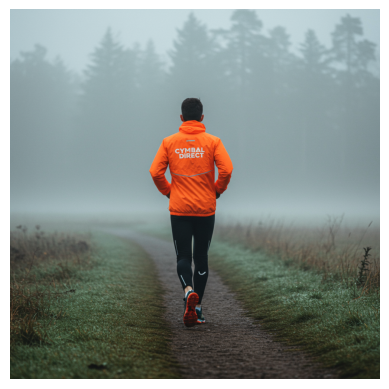

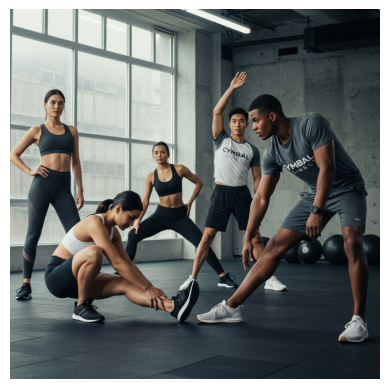

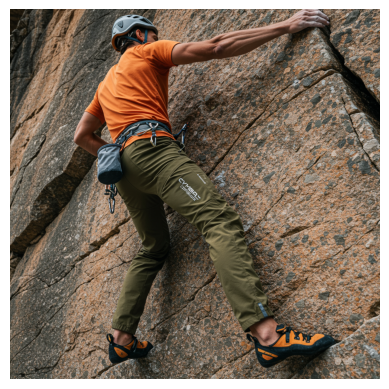

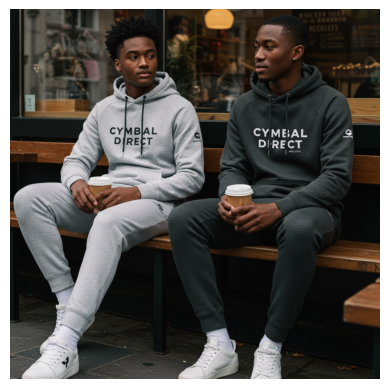

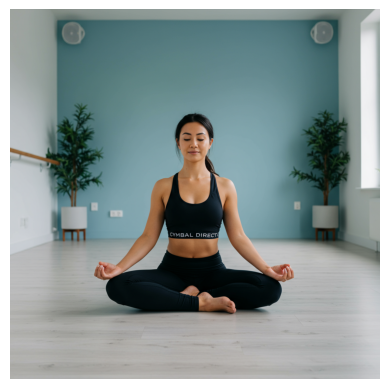

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the directory where the images are stored
image_dir = 'media/images'

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

# Display the images
for image_file in image_files:
    # Construct the full path to the image file
    image_path = os.path.join(image_dir, image_file)
    
    # Load the image
    img = mpimg.imread(image_path)
    
    # Display the image using Matplotlib
    plt.figure()  # Create a new figure for each image
    plt.imshow(img)
    plt.axis('off')  # Hide the axis
    plt.show()

### Initial Analysis with Gemini 2.0 Flash

For this section, you will need to fill out the `#TODOs` for **Construct the prompt for Gemini** and **Send the prompt and images to Gemini**.

In [19]:
MODEL_ID = "gemini-2.0-flash-001"  # @param {type: "string"}

In [20]:
# 1. Load the image data
image_folder = 'media/images'
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

# 2. Load the images into a list of `Part` objects
image_parts = []
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    with open(image_path, 'rb') as f:
        image_bytes = f.read()
    image_parts.append(Part.from_bytes(data=image_bytes, mime_type='image/jpeg'))  # Adjust mime_type if needed

# 3. Construct the prompt for Gemini
# TODO: Write a prompt that instructs the Gemini model to analyze the images of Cymbal Direct's new athletic apparel line.
# The prompt should include clear instructions to:
# - Identify the apparel items in each image.
# - Describe the attributes of each item.
# - Identify any prominent style trends or preferences.
prompt = f"""
You are an AI assistant analyzing visual content for Cymbal Direct's new athletic apparel line. 
Carefully analyze the following images and provide insights:
- Identify the apparel items shown in each image (e.g., shirts, leggings, shoes, accessories).
- Describe the attributes of each item (e.g., color, design, material, fit, style).
- Identify any prominent style trends, patterns, or customer preferences that emerge across the images.

Present the findings clearly so they can be included in a market research report.
"""

# 4. Send the prompt and images to Gemini
# TODO: Use the `client.models.generate_content` method to send the prompt and images to the Gemini model.
# TODO: Make sure to specify the `MODEL_ID` and the `contents` (including the prompt and image parts) as parameters.
# TODO: Store the response from the model in a variable named `response`.
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[prompt] + image_parts
)

# 5. Display the response
display(Markdown(response.text))


Here's an analysis of the Cymbal Direct athletic apparel line based on the provided images:

**Overall Impressions:**

*   The line appears to cater to a variety of athletic activities, including running, gym workouts, yoga/meditation, and outdoor sports like rock climbing.
*   There's a good balance between functional athletic wear and more casual, lifestyle-oriented pieces (e.g., hoodies and tracksuits).
*   The branding is present but generally subtle and integrated well into the designs.
*   A focus on neutral color palettes punctuated by brighter accents is apparent.

**Detailed Image Analysis:**

**Image 1: Runner in Orange Jacket**

*   **Apparel:** Running jacket, leggings, running shoes
*   **Attributes:**
    *   Jacket: Bright orange, lightweight material (possibly water-resistant), slim fit, Cymbal Direct logo on the back.
    *   Leggings: Black, likely moisture-wicking fabric, reflective detailing.
    *   Shoes: Performance-oriented, likely with good cushioning and traction, red and black.
*   **Style/Trends:** High-visibility outerwear for running in low-light conditions; performance-focused athletic wear.

**Image 2: Group Workout**

*   **Apparel:** Sports bras, leggings, shorts, t-shirts, casual sneakers
*   **Attributes:**
    *   Sports bras: Black and grey; various styles (racerback, scoop neck), likely supportive and moisture-wicking.
    *   Leggings: Grey, black, potentially compression fit, one pair has a subtle mesh design.
    *   Shorts: Black, athletic cut.
    *   T-shirts: Grey, white, casual fit, Cymbal Direct logo on the front.
    *   Shoes: casual sneakers
*   **Style/Trends:** Mix of fitted and looser garments for flexibility during workouts; layering options; classic black and gray color scheme.

**Image 3: Rock Climber**

*   **Apparel:** T-shirt, climbing pants, climbing shoes, helmet, harness
*   **Attributes:**
    *   T-shirt: Orange, short-sleeved, athletic fit.
    *   Pants: Olive green, durable material, articulated knees, likely water-resistant, Cymbal Direct logo and possibly some features details on the pant leg.
    *   Shoes: Specialized climbing shoes (specific brand visible in the picture).
*   **Style/Trends:** Functional apparel designed for specific outdoor sports with focus on durability and range of movement.

**Image 4: Men in Hoodies**

*   **Apparel:** Hoodies, track pants, sneakers
*   **Attributes:**
    *   Hoodies: Grey and charcoal, classic fit, drawstring hood, kangaroo pocket, Cymbal Direct logo prominently displayed.
    *   Track pants: Matching grey and charcoal, classic fit, drawstring waistband.
    *   Sneakers: White, casual style.
*   **Style/Trends:** Athleisure wear focused on comfort and style; monochromatic color schemes; prominent branding.

**Image 5: Woman Meditating**

*   **Apparel:** Sports bra, leggings.
*   **Attributes:**
    *   Sports bra: Black, minimalist design, likely soft and supportive. Cymbal Direct logo on the front
    *   Leggings: Black, high-waisted, comfortable material, full-length.
*   **Style/Trends:** Comfortable and flexible apparel for yoga, Pilates, or other low-impact activities; minimalist design.

**Emerging Style Trends and Customer Preferences:**

*   **Versatility:** Apparel that can transition from workout to everyday wear is a key trend.
*   **Comfort and Functionality:** Performance fabrics, comfortable fits, and functional features (e.g., moisture-wicking, water resistance) are important.
*   **Neutral Color Palettes with Pops of Color:** Black, gray, and olive green are prominent, often contrasted with brighter colors like orange for visibility or style.
*   **Branding Integration:** The Cymbal Direct logo is visible but not overly intrusive, suggesting a focus on quality and design rather than just brand name.
*   **Inclusivity:** The images feature a diverse range of individuals and body types, suggesting a broad target audience.
*   **Athleisure Focus:** The hoodies and tracksuits highlight the growing trend of wearing athletic-inspired clothing for leisure and everyday activities.

This analysis can be used to inform marketing strategies, product development decisions, and overall brand positioning for Cymbal Direct's new athletic apparel line.


### Reasoning on image trends with Gemini-2.5-flash

You'll now use the Thinking model to perform a more in-depth analysis of the visual elements, inferring context, target audience, and potential marketing implications.

For this section, you will need to fill out the `#TODOs` for **Construct the prompt for Gemini** and **Send the prompt and images to the Gemini Thinking model**.

In [21]:
MODEL_ID = "gemini-2.5-flash"  # @param {type: "string"}

In [22]:
# 1. Construct the prompt for Gemini
# TODO: Write a prompt that instructs the Gemini model to analyze the images in more detail.
# The prompt should include clear instructions to:
# - Develop a hypothesis about the target audience for each image.
# - Analyze how visual elements contribute to the overall message and appeal.
# - Compare the observed style trends with broader fashion trends in athletic wear.
# - Provide recommendations for Cymbal Direct's future marketing campaigns or product development.
thinking_mode_prompt = f"""
You are an expert visual analyst evaluating Cymbal Direct's new athletic apparel line. 
Carefully analyze the following images and provide a deeper level of insight:
- Develop a hypothesis about the target audience for each image (consider age, gender, lifestyle, fitness level).
- Analyze how visual elements (e.g., colors, poses, backgrounds, models) contribute to the overall message and appeal.
- Compare the style trends observed in these images with broader fashion trends in the athletic wear industry.
- Provide actionable recommendations for Cymbal Direct's future marketing campaigns or product development, highlighting opportunities to better connect with their audience.

Here are the images to analyze:
"""

# 2. Send the prompt and images to the Gemini Thinking model
# TODO: Use the `client.models.generate_content` method to send the thinking_mode_prompt and images to the Gemini model.
# TODO: Make sure to specify the `MODEL_ID`, `contents` (including the prompt and image parts), and `config` to enable thinking mode.
# TODO: Store the response from the model in a variable named `thinking_model_response`.
thinking_model_response = client.models.generate_content(
    model=MODEL_ID,
    contents=[thinking_mode_prompt] + image_parts,
    config=config
)

# 3. Print thoughts and answer
print_thoughts(thinking_model_response)

# 4. Save the image analysis to a file
with open('analysis/image_analysis.md', 'w') as f:
    f.write(thinking_model_response.text)


## Thoughts:
Okay, let's get this visual analysis going. First, I need to wrap my head around the *goal*: a deep dive into Cymbal Direct's apparel, looking at the target audience for each image, visual elements, where they fit within broader trends, and, critically, actionable recommendations. That's the framework.

Alright, let's do a quick *scan* to get a feel for the overall *vibe*. Image one screams "serious runner, pushing limits, all-weather." Image two looks like a gym, representing a group of friends and casual athleisure. Image three is "mountain climbing, rugged gear, adventure." Image four is "athleisure, chill, casual, coffee." Lastly, Image five, it's "yoga, mindful, tranquil." Okay, I've got a handle on the initial impression.

Now for some structure. The prompt *already* gives me a solid structure, so I'll work with that: target audience hypothesis, visual elements breakdown, trend comparison, and recommendations. That saves me some time!

Now, I'll go *deep dive, image by image.*

**Image 1 (Runner):** Hmm, let's analyze this solo runner image.

*   **Target Audience Hypothesis:** The runner is likely *25-45 years old*, probably more mature than the teen market. The image is male-coded in this shot, but that high-vis jacket could easily be unisex. Focusing on performance here, so less gender-specific. The lifestyle is centered around a dedicated, consistent exercise routine and health. This feels like *intermediate to advanced runners* who take their training seriously.
*   **Visual Elements:** The bright orange *jacket* screams high visibility, in contrast with the muted cool tones of the fog, trees, and path. The *pose* is a back shot, which represents forward momentum and anonymity, inviting the viewer to project themselves into the scenario. The *background* is a misty forest path, which evokes nature, solitude, challenge, and the act of "getting it done." The *model* is clearly fit and focused, and the focus is on the performance of the product in a challenging environment. Overall *message: performance, dedication, overcoming the elements, and safety.*
*   **Keywords:** I would pick *performance, durability, visibility, dedication, nature, and solitude* as my key words.

Okay, that's the core of the first analysis. On to the next image...


## Answer:
As an expert visual analyst, I've carefully reviewed Cymbal Direct's athletic apparel imagery. Here's a deeper dive into their visual communication strategy:

## Visual Analysis of Cymbal Direct's Athletic Apparel Line

Cymbal Direct employs a diverse range of visual strategies to showcase their athletic wear, targeting different segments of the fitness and lifestyle market.

---

### Image 1: The Solitary Runner



## Task 4. Analyze and reason on audio content: Customer perceptions

In this section, you will use Gemini to analyze a podcast about Cymbal Direct's new clothing line and extract information/sentiment out of it and use those to generate insights for the company. You will save the findings from the model into a markdown file that you will use for a comprehensive report in the last task.

**Your tasks will be labeled with a `#TODO` section in the cell. Read each cell carefully and ensure you are filling them out correctly!**

#### Introduction and Context
This audio clip is from a podcast episode featuring an interview with a Cymbal Direct representative discussing the new athletic apparel line. The conversation covers various aspects of the apparel, including design, features, target audience, and marketing strategy.

### Preview the podcast episode (optional)

To listen to the podcast episode, you can copy the file to your local environment and use iPython to preview it in the notebook.

In [23]:
# import IPython

# !gcloud storage cp gs://{PROJECT_ID}-bucket/media/audio/cymbal_direct_expert_interview.wav \
# media/audio/cymbal_direct_expert_interview.wav
print("Subscribe To Quicklab")
# IPython.display.Audio('media/audio/cymbal_direct_expert_interview.wav')

Subscribe To Quicklab


### Initial analysis with Gemini 2.0 Flash
For this section, you will need to fill out the `#TODOs` for **Construct the prompt for Gemini** and **Send the prompt and audio to Gemini**.

In [24]:
MODEL_ID = "gemini-2.0-flash-001"  # @param {type: "string"}

In [25]:
# Construct the file URI using f-string
file_uri = f"gs://{PROJECT_ID}-bucket/media/audio/cymbal_direct_expert_interview.wav"

audio_part = Part.from_uri(
    file_uri=file_uri,
    mime_type="audio/wav",
)

In [26]:
# 1. Construct the prompt for Gemini
# TODO: Write a prompt that instructs the Gemini model to analyze the audio recording of the conversation about Cymbal Direct's new athletic apparel line.
# The prompt should include clear instructions to:
# - Transcribe the conversation, identifying different speakers.
# - Provide a sentiment analysis, highlighting positive, negative, and neutral opinions.
# - Identify key themes and topics discussed, such as comfort, fit, performance, style, and comparisons to competitors.
thinking_mode_prompt = f"""
You are an AI assistant analyzing a podcast interview about Cymbal Direct's new athletic apparel line. 
Carefully process the following audio clip and provide a structured analysis:
1. Transcribe the conversation, clearly identifying different speakers.
2. Provide sentiment analysis for each speaker turn, highlighting positive, negative, and neutral opinions.
3. Identify key themes and topics discussed (e.g., comfort, fit, performance, style, comparisons to competitors, marketing strategy).
4. Summarize the overall perception of Cymbal Direct’s new athletic apparel line as conveyed in the discussion.
"""

# 2. Send the prompt and audio to Gemini
# TODO: Use the `client.models.generate_content` method to send the thinking_mode_prompt and audio data to the Gemini model.
# TODO: Make sure to specify the `MODEL_ID` and the `contents` (including the `audio_part` and the `prompt`) as parameters.
# TODO: Store the response from the model in a variable named `response`.
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[thinking_mode_prompt, audio_part]
)

# 3. Display the response
display(Markdown(response.text))


Okay, here's the analysis of the podcast audio clip:

**1. Transcription:**

*   **Host 1:** Hey everyone and welcome back. Today we're going to be doing something a little different.
*   **Host 2:** Ooh.
*   **Host 1:** Yeah, we're going deep on athletic apparel.
*   **Host 2:** Interesting.
*   **Host 1:** Yeah, you guys requested a deep dive into Cymbal Direct's new line. And honestly, I'm pretty curious too. I mean, they make killer shoes, but apparel, that's a whole other ball game. To help us break it all down, we've got insights from a recent Cymbal Direct customer, Sarah, a marathon runner, Mark, and to get that style perspective, fashion expert, Chloe.
*   **Host 2:** So, we're really looking at this from all angles, performance, fashion, the whole nine yards.
*   **Host 1:** Exactly. We're going to see if Cymbal Direct can really pull this off. So, first impressions, um, Sarah was actually surprised to see Cymbal Direct moving into apparel. But what really got her was their online presentation. She said it wasn't just like product photos, they used lifestyle imagery and actually explained the fabric technology, like they weren't just slapping a logo on a t-shirt, you know.
*   **Host 2:** Makes sense. They're known for quality with their shoes, so they're probably trying to project that same image onto the apparel.
*   **Host 1:** Yeah, leverage that reputation they've already built. Okay, but what about the actual performance? Mark, our marathon runner, zeroed in on the flatlock seams. He was happy to see that Cymbal Direct used them. But I gotta ask, is that really a big deal? Don't a lot of athletic wear brands use flatlock seams?
*   **Host 2:** Yeah. Sure, flatlock seams are pretty common, but the type and how they're actually done can vary. Like some brands will use really narrow seams to save money, but that can make them fall apart faster.
*   **Host 1:** Oh, interesting.
*   **Host 2:** Yeah. And some use thick thread that ends up feeling bulky and uncomfortable, you know what I mean?
*   **Host 1:** Yeah, totally. So, what about Cymbal Direct's seams? Anything special about them?
*   **Host 2:** Well, that's what we want to find out. What did Mark say?
*   **Host 1:** Well, he mentioned that the seams felt really smooth and laid flat against his skin, even after a long run. And get this, no chafing.
*   **Host 2:** Oh, wow, that's huge, especially for a marathon runner.
*   **Host 1:** Yeah. So I guess it's not just about having flatlock seams, it's about how well they're done.
*   **Host 2:** Absolutely. That attention to detail can be a sign that a brand is serious about performance. You know, they're not just throwing seams on a garment, they're thinking about how they'll actually feel during a workout.
*   **Host 1:** Okay, makes sense. Now onto fabric weight. Mark said Cymbal Direct seemed to find a good balance, not too heavy, not too light.
*   **Host 2:** The Goldilocks zone of athletic wear.
*   **Host 1:** Right. But why is fabric weight so important?
*   **Host 2:** Well, it's all about finding that sweet spot between breathability and how tough the fabric is. Like a heavier fabric might last longer.
*   **Host 1:** Makes sense.
*   **Host 2:** But it could also trap heat and make you feel like you're suffocating when you're working out.
*   **Host 1:** Ugh, yeah, I hate that.
*   **Host 2:** Right. Then on the flip side, a lighter fabric might let more air in.
*   **Host 1:** Good and cool.
*   **Host 2:** But then it might pill or rip really easily. So, it's a balancing act.
*   **Host 1:** Gotcha. So, what can you tell us about the fabric Cymbal Direct is using? Did they get into specifics?
*   **Host 2:** Oh yeah, they did. In their leggings, they use a nylon spandex blend that's woven in a special way for moisture wicking and four-way stretch. Fancy. And get this, the fabric weight is around 280 GSM. That's considered mid-weight for leggings, good for a lot of different activities.
*   **Host 1:** So, they're using a fabric that's both functional and versatile. Seems to go their whole approach, you know, appealing to a wider audience.
*   **Host 2:** Right. And it tells us they put some thought into the fabrics they're using. Like they didn't just pick whatever's trendy. They chose materials that make sense for what people will be doing in these clothes.
*   **Host 1:** Okay, let's bring in the style perspective. Chloe, our style guru told us that athleisure is evolving. It's not just like yoga pants to the grocery store anymore.
*   **Host 2:** Right, right.
*   **Host 1:** People want athletic apparel that looks good in and out of the gym.
*   **Host 2:** Yeah, athleisure has become so much more sophisticated now. It's all about this finer details, clean lines, versatility. People want pieces that they can wear to the gym and then to lunch with friends, and then maybe even to the office.
*   **Host 1:** Yeah, totally. So, did Chloe think Cymbal Direct's designs hit that sweet spot, sporty and stylish?
*   **Host 2:** She was really impressed with the little design elements they included like the hidden pockets in the leggings.
*   **Host 1:** Oh, cool.
*   **Host 2:** Yeah, functional but don't interrupt the sleek look. They also used reflective accents, so you're visible when you're working out when it's dark out, but it's subtle and stylish, not like those crazy reflective vests, you know.
*   **Host 1:** Yeah, I know exactly what you mean. So they're thinking about how it looks and how it works, which is what you want in good athleisure. What about the fit? Did Chloe say anything about that?
*   **Host 2:** She said the fit was generally flattering and true to size and she really liked the high waisted leggings, good support and coverage.
*   **Host 1:** Makes sense. And the tops?
*   **Host 2:** Tops were designed to be a bit loose fitting, you know, allows for breathability and movement, but not so loose that they look baggy.
*   **Host 1:** Okay, so far it sounds like Cymbal Direct is doing pretty good, performance, style, attention to detail. But how does it actually feel to wear their clothes?
*   **Host 2:** Well, Sarah described the leggings as feeling like a second skin.
*   **Host 1:** Wow, high praise.
*   **Host 2:** Right. She said they were supportive but not too tight and the fabric felt really nice against her skin.
*   **Host 1:** That's awesome. I'm always a little iffy about leggings that are super compressive, you know, I don't want to feel like I'm being squeezed.
*   **Host 2:** Oh yeah, I hear you. It's all about the right amount of compression, too much and it's uncomfortable, restricts your movement. But too little and it just feels flimsy, like it's not doing anything.
*   **Host 1:** Exactly. What about the tops? Any feedback on those?
*   **Host 2:** Sarah said the top was really breathable but it kind of clung to her when she got sweaty. Okay. And this brings up a good point about different fabrics and what they're good at. Some are awesome at wicking away moisture but get clingy when they're wet, others are super soft but don't breathe that well.
*   **Host 1:** So, it's all about picking the right fabric for what you're doing.
*   **Host 2:** Right. Speaking of what you're doing, let's see how Cymbal Direct's apparel holds up in different weather. Mark, our marathon runner, wore these clothes in both hot and cold weather.
*   **Host 1:** That's a real test, because how well your clothes deal with sweat can make or break a workout, especially in tough conditions. And what was the verdict? Did the moisture wicking hold up?
*   **Host 2:** Mark said it worked really well in both hot and cold weather.
*   **Host 1:** Wow, that's impressive.
*   **Host 2:** He didn't feel too hot or sweaty when it's hot out and the fabric dried fast when he did sweat. So, seems like they're using some pretty high-tech stuff.
*   **Host 1:** They are. But it's not just the fabric, right? They also included design features to help with breathability, like much panels in certain areas.
*   **Host 2:** Exactly. It's a combination of things working together.
*   **Host 1:** Okay, let's talk about those compression shorts Mark was wearing. He said they helped reduce fatigue on his long runs. Now, I've heard a lot about compression wear, but does it really work?
*   **Host 2:** It's kind of a science and kind of an art. The idea is that by gently squeezing your muscles, you're improving blood flow and reducing vibration in the muscles and that can make you less tired and sore.
*   **Host 1:** So it's not just a marketing gimmick.
*   **Host 2:** Nope, there's actually research that backs it up. Of course, how well it works can depend on the type of compression, how the garment's designed, and the person wearing it. But there's definitely something to it.
*   **Host 1:** Cool. Okay, we've covered first impressions, performance and style. Now let's get into those little details. Chloe, our fashion expert, has a great eye for those things. What stood out to her?
*   **Host 2:** She was impressed with the overall quality, like the stitching, the zippers, the seams. It was all really well done.
*   **Host 1:** I never thought about it like that. But yeah, those small details can tell you a lot about a brand.
*   **Host 2:** Exactly. It shows they care about making a quality product and she also pointed out the pockets.
*   **Host 1:** Oh yeah, pockets are important.
*   **Host 2:** Right. They were actually usable and not just for show. Like the leggings have a hidden pocket in the waistband, perfect for a key or a card and the jackets have zippered pockets that are easy to reach.
*   **Host 1:** So, they're thinking about both how it looks and how practical it is. I'm liking this attention to detail. What about the colors? Did Cymbal Direct play it safe or get adventurous?
*   **Host 2:** They did a good job of mixing trendy colors with classic ones.
*   **Host 1:** Like what?
*   **Host 2:** Well, they've got a range of earthy tones, like olive green, charcoal gray, navy blue, those are super popular right now. But then they also have brighter colors, like teal, coral, sunny yellow, you know, to add a little pop.
*   **Host 1:** I love that. Those earth tones are so easy to wear. But those pops of color are fun too. It's like they're giving you options to express your style.
*   **Host 2:** Right. And again, I think it goes back to their target audience. They're appealing to serious athletes, but also people who just want stylish clothes they can wear anywhere.
*   **Host 1:** Yeah, that athleisure sweet spot. All right, let's talk durability. We all know athletic apparel takes a beating, especially if you're working out a lot. Did Mark have any thoughts on how durable Cymbal Direct's clothes are? I mean, he's the marathon runner, gotta figure he's pretty tough on his gear.
*   **Host 2:** He said so far he hasn't noticed any wear and tear. But he did say it's still early to really know for sure.
*   **Host 1:** Yeah, that makes sense. You can't judge something after just a few wears.
*   **Host 2:** Right. He wants to see how they hold up at more washes and tougher workouts, but it's a good sign that he hasn't seen any problems yet.
*   **Host 1:** Definitely. Okay, time to talk money. Chloe mentioned Cymbal Direct's prices are competitive, especially for the quality. What does that actually mean though?
*   **Host 2:** So their leggings are around $80-100 which is similar to other high-end athleisure brands, tops are $40-60, jackets are $100-150.
*   **Host 1:** Okay, so not the cheapest but not crazy expensive either.
*   **Host 2:** Right, they're positioning themselves as a premium brand, but they also want to make it accessible, you know? Not just for the super rich.
*   **Host 1:** Gotcha. Now we've covered a lot already but before we move on, I want to know what our guests are hoping to see from Cymbal Direct in the future. You know, what's on their wish list?
*   **Host 2:** Well, Sarah wants them to make sports bras and maternity wear.
*   **Host 1:** Makes sense. They've got the leggings and tops covered so those seem like natural next steps.
*   **Host 2:** Exactly. And Mark, being the runner that he is, wants more trail running gear, like lightweight jackets and moisture wicking shorts. He'd also like to see some outerwear, like rain jackets and vests.
*   **Host 1:** So really round out their offerings for runners?
*   **Host 2:** Yep, different activities, different weather, the whole shebang. And then Chloe, always thinking about fashion, wants designer collaborations and smart fabrics.
*   **Host 1:** Oh, cool.
*   **Host 2:** Yeah, like imagine a limited edition collection designed by like a famous fashion designer or clothes with built-in technology like temperature regulation or UV protection.
*   **Host 1:** Wow, those are some big goals. But I could see how that would take the brand to the next level.
*   **Host 2:** It shows that Cymbal Direct is thinking about the future of athleisure, not just trying to fit in, they want to be innovative.
*   **Host 1:** Okay, we've covered a ton of ground today, but there's still so much more to unpack. Let's take a quick break and come back to discuss what all this means for Cymbal Direct and the future of athleisure.
*   **Host 2:** It's really interesting to see how Cymbal Direct is taking what they know about shoes and applying it to clothes. Like they're approaching it with the same attention to detail and innovation.
*   **Host 1:** Yeah, for sure. So before the break, we were talking about those ambitious goals they have, like designer collabs and smart fabrics. They're definitely not afraid to dream big. But are they getting ahead of themselves? Can they really compete with the big dogs in the athleisure world?
*   **Host 2:** Well, that's the big question isn't it? It's definitely a bold move to jump into a market that's already so crowded, especially when you're going up against brands that have been around forever.
*   **Host 1:** So what do you think? What are Cymbal Direct's chances?
*   **Host 2:** Well, I think they've got a few things working in their favor. For one, they've already got a really good reputation. People trust Cymbal Direct. They know they make quality stuff, so they're more likely to at least give their clothes a shot.
*   **Host 1:** Yeah, that makes sense. They're not starting from scratch. They've already built up that trust. What else?
*   **Host 2:** They also seem to be really strategic about this whole thing. It's not like they're just throwing clothes out there and hoping for the best. They're doing their research, they're focusing on performance and style and they're paying attention to what customers want.
*   **Host 1:** So they're being smart about it. They're not just following the trends, they're trying to set them.
*   **Host 2:** Exactly. And another thing, they're entering the market when athleisure is still on the rise. Like, the demand for stylish workout clothes that you can actually wear outside the gym is just getting bigger and bigger. So, there's a lot of room for them to grow.
*   **Host 1:** So they're riding the wave, but they're also trying to make their own wave.
*   **Host 2:** Right. But of course, there are challenges too. I mean the athleisure market is super competitive. Like there are so many brands out there all fighting for the same customers.
*   **Host 1:** Yeah, and some of those brands are huge. They've got tons of money for marketing and they're everywhere.
*   **Host 2:** Exactly. So Cymbal Direct's gonna have to be creative if they want to stand out.
*   **Host 1:** So how do they do that? How do they make sure they're not just another brand in the sea of athleisure?
*   **Host 2:** Well, I think they need to keep doing what they're doing, focus on what makes them different. They can use their knowledge of footwear technology to make clothes that are actually innovative and they need to keep building their brand story, connect with people on a deeper level, you know, make them feel something.
*   **Host 1:** So it's not just about the clothes, it's about the whole experience.
*   **Host 2:** Exactly. And they need to be flexible too. Like the athleisure market changes all the time. So they need to be able to keep up with the trends and adapt if they want to stay relevant.
*   **Host 1:** So they gotta be trend setters not trend followers.
*   **Host 2:** Right. And they need to be patient too. Building a successful brand takes time. It's not gonna happen overnight.
*   **Host 1:** It's a marathon, not a sprint.
*   **Host 2:** Exactly. But if they do things right, they've got a real shot at becoming a major player in this market.
*   **Host 1:** So a tough road ahead, but they've got potential. Out of all the things we talked about, what do you think is the most important thing for them to succeed?
*   **Host 2:** Honestly, I think it comes down to the customer. If they can make products that people genuinely love and create a positive experience for those customers, they'll be golden.
*   **Host 1:** So it's all about the love.
*   **Host 2:** Kinda, yeah. They need to create a brand that people are passionate about.
*   **Host 1:** Well, I love that. And on that note, thanks for joining us for this deep dive.
*   **Host 2:** My pleasure.
*   **Host 1:** Now let's move on and discuss what this all means for the future of athletic apparel as a whole. So we've really explored this new line from every angle. The performance, the style, the tech, the price. And I got to say, I'm impressed. They really did their homework. But what's the big takeaway here? What does this tell us about the future of athletic apparel?
*   **Host 2:** Well, that's the big question, isn't it? I think Cymbal Direct's approach is kind of showing us where things are headed. Like we're seeing a shift in the industry. It's not just about performance or style anymore.
*   **Host 1:** Yeah, totally. It's gotta be both.
*   **Host 2:** Right, like making clothes that just wick away sweat, that's not enough anymore. People want clothes that make them look good and feel good, no matter what they're doing at the gym, running errands, hanging at home.
*   **Host 1:** They wanna look good doing it all.
*   **Host 2:** Exactly. And Cymbal Direct gets that. They're not trying to be just another Nike or Lulu Lemon. They're finding their own lane by commending that performance tech with stylish designs. And they're really focusing on the whole customer experience.
*   **Host 1:** Yeah, like those hidden pockets and reflective accents, it's like they're saying, hey, we get you, we know what you need.
*   **Host 2:** And that's huge these days. People have so many choices. Like, you can buy workout clothes anywhere. So brands gotta give people a reason to pick them.
*   **Host 1:** So it sounds like Cymbal Direct's strategy is all about winning people over with quality, innovation and really understanding what their customers want.
*   **Host 2:** Right. It's not just about throwing a logo on something and calling it a day. They're actually thinking about the person wearing the clothes. How they're gonna feel, how they're gonna work in different situations.
*   **Host 1:** I like that. So they're taking a more well-rounded approach.
*   **Host 2:** Exactly. And I think that's gonna be really important for any brand that wants to make it in athleisure.
*   **Host 1:** Okay, so to wrap things up, what are the big takeaways from our deep dive into Cymbal Direct? What should our listeners be thinking about as they're deciding whether to buy some of these pieces?
*   **Host 2:** First off, I think Cymbal Direct is a brand to keep an eye on. They're serious about making high-quality athletic apparel that looks as good as it performs. Agreed. And second, I think they're a great example of how brands can stand out in a crowded market by focusing on innovation, customer experience and having a strong brand identity.
*   **Host 1:** Right, they're not afraid to push the boundaries. But they're also staying true to their core values like quality and performance.
*   **Host 2:** Exactly. And finally, I think Cymbal Direct's success is gonna come down to whether they can keep up with the changes in the athleisure market. Like it's always evolving so they need to evolve with it.
*   **Host 1:** So they need to stay ahead of the game, keep innovating and most importantly, keep listening to their customers.
*   **Host 2:** Absolutely. They had a great launch, but the real challenge is staying relevant and exciting over time.
*   **Host 1:** Well, it's a great point to end on. Thanks for joining us for this deep dive into Cymbal Direct. And until next time, keep exploring.

**2. Sentiment Analysis:**

*   **Host 1:** Mostly neutral and positive. Expresses curiosity and intrigue about the brand, positive opinions of online presentation, and high praise of wear.
*   **Host 2:** Mostly neutral and positive. Provides in-depth insights and agrees with host 1's sentiment.
    *Positive: *Praises the quality of product, and says they are a brand to watch.*
    *Negative: *Expresses concern that the the product may cling when the wearer sweats.*

**3. Key Themes and Topics Discussed:**

*   **First Impressions:** Sarah's surprise at Cymbal Direct entering apparel, impressed by the online presentation using lifestyle imagery and explaining fabric technology.
*   **Performance:**
    *   **Flatlock Seams:** Importance of well-done flatlock seams, Mark's feedback on smoothness and no chafing.
    *   **Fabric Weight:** Importance of balance between breathability and durability; fabric blend used (nylon-spandex), and weight (280 GSM).
    *   **Moisture Wicking:** Performance in hot and cold weather, design features for breathability (mesh panels).
    *   **Compression:** Benefits of compression shorts (reduced fatigue) with caveats.
*   **Style:**
    *   **Athleisure Evolution:** Athleisure as more than just workout clothes, emphasis on finer details, clean lines, and versatility.
    *   **Design Elements:** Hidden pockets, reflective accents.
    *   **Fit:** Flattering and true-to-size fit, high-waisted leggings for support.
    *   **Color Palette:** Blend of trendy and classic colors, earthy tones and pops of color.
*   **Quality and Durability:** Overall quality of stitching, zippers, seams, early feedback on durability from Mark.
*   **Pricing:** Competitive pricing, positioned as a premium but accessible brand.
*   **Future Product Wishes:** Sports bras, maternity wear, trail running gear, designer collaborations, smart fabrics.
*   **Competition:** Recognizing the crowded athleisure market and the need for Cymbal Direct to differentiate itself.
*   **Brand Strategy:** Strategic approach focusing on performance, style, and customer feedback; setting trends rather than following them.
*   **Customer Experience:** Importance of creating products people genuinely love and a positive brand experience.

**4. Overall Perception:**

The overall perception of Cymbal Direct's new athletic apparel line is **positive**. The hosts are impressed by the brand's attention to detail, use of technology, stylish designs, and commitment to customer experience. They see Cymbal Direct as a promising new player in the athleisure market with the potential to stand out and succeed due to its strategic approach and focus on quality. However, the hosts emphasize that staying relevant in the competitive market will require ongoing innovation and a continued focus on customer needs.

### Reasoning on Audio Insights with Gemini-2.5-flash
In this section, you'll use the Thinking model to analyze the conversation at a deeper level, reason about customer satisfaction, deduce influencing factors, and generate data-driven recommendations.

For this section, you will need to fill out the `#TODOs` for **Construct the prompt for Gemini** and **Send the prompt and audio to the Gemini Thinking model**.

In [32]:
MODEL_ID = "gemini-2.5-flash"  # @param {type: "string"}

In [33]:
# 1. Construct the prompt for Gemini
# TODO: Write a prompt that instructs the Gemini model to analyze the audio recording in more detail.
# The prompt should include clear instructions to:
# - Reason about the overall customer satisfaction with the apparel.
# - Deduce the key factors influencing customer perception.
# - Develop three data-driven recommendations for Cymbal Direct.
# - Identify any potential biases or limitations in the audio data.
prompt = """
You are an expert analyst evaluating a podcast interview about Cymbal Direct’s new athletic apparel line.
Analyze the audio in depth and provide a concise, decision-ready report.

Deliverables (use Markdown with the following sections):
1) **Executive Summary** — 4–6 bullets on the biggest insights.
2) **Overall Customer Satisfaction** — reasoned judgment (e.g., positive / mixed / negative) with 2–3 evidence points from the conversation.
3) **Key Factors Influencing Perception** — analyze and rate influence (High/Medium/Low) for: comfort, fit/sizing, performance (moisture-wicking, breathability), durability/material quality, style/design, price/value, inclusivity/sizing range, sustainability, customer service, and competitor comparisons.
4) **Recommendations (3)** — each with:
   - *Action*: specific step for product or marketing.
   - *Rationale*: tie to statements or sentiments from the interview.
   - *Expected Impact/KPIs*: e.g., CSAT, NPS, conversion rate, return rate.
5) **Biases & Limitations** — identify potential biases (e.g., brand representative viewpoint, selection bias, lack of quantitative data, audio quality) and how they could skew conclusions.

Be explicit, evidence-driven, and avoid speculation beyond what the audio supports.
"""

# 2. Send the prompt and audio to the Gemini Thinking model
# TODO: Use the `client.models.generate_content` method to send the prompt and audio data to the Gemini model.
# TODO: Make sure to specify the `MODEL_ID`, `contents` (including the `audio_part` and the `prompt`), and `config` to enable thinking mode.
# TODO: Store the response from the model in a variable named `thinking_model_response`.
thinking_model_response = client.models.generate_content(
    model=MODEL_ID,
    contents=[prompt, audio_part],
    config=config
)

# 3. Print the thoughts and answer
print_thoughts(thinking_model_response)

# 4. Save the audio analysis to a text file in the analysis folder
with open('analysis/audio_analysis.md', 'w') as f:
    f.write(thinking_model_response.text)


## Thoughts:
Alright, here's what I'm thinking. This podcast interview... it's my focus. I need a sharp, decision-ready analysis of Cymbal Direct's new athletic apparel. Time to get down to business.

First, **listen, listen, listen.** Deep dive into the audio. I'll be dissecting every word, identifying the key themes, the quotes that matter, who said what – Sarah, the marathon runner/customer; Mark, another runner; and Chloe, the fashion expert. I'll be meticulously tracking the positive, negative, and neutral sentiments, and making sure I note their perspectives.

Then, the real work begins. I'm going to distill everything into a **Markdown-formatted report** that is concise and actionable.

Here's the plan:
*   I'll kick things off with a punchy **Executive Summary** – 4-6 bullets that give a snapshot of the whole picture. What's the overall vibe? Strengths and any red flags?
*   Next, I'll give an **Overall Customer Satisfaction** assessment. Based on what Sarah, Mark, and Chloe had to say, what's the general buzz? I need a reasoned judgment, supported by concrete evidence from their statements.
*   The core of the analysis will be the **Key Factors Influencing Perception**. I’ll systematically examine each factor – comfort, fit/sizing, performance, durability, style, price, inclusivity, sustainability, customer service, and competitor comparisons. I’ll pull the relevant data, weigh it, and give each factor an influence rating: High, Medium, or Low.
*   Then, the **Recommendations**. I’ll come up with three specific recommendations, each with a clear action, the rationale behind it, and the expected impact (KPIs). We need to be actionable, not just descriptive.
*   Finally, I'll call out the **Biases & Limitations**. It's critical to recognize potential pitfalls. This is critical. The tone feels very positive, almost like a promotional piece. I need to flag potential for bias, selection issues, the absence of hard data, and this kind of “advertorial” feel. Transparency is key.

Okay, let's get this done. Time to crank up that audio.


## Answer:
## Cymbal Direct Athletic Apparel Line: In-Depth Analysis

### 1. Executive Summary

*   Cymbal Direct's new athletic apparel line is **well-received by initial feedback**, particularly for its focus on performance, attention to detail, and versatile style.
*   **Performance aspects like flatlock seams, balanced fabric weight (280 GSM nylon-spandex blend), and effective moisture-wicking** are highlighted as key strengths, even in varied weather conditions.
*   The designs are considered **stylish and functional**, blending athleisure trends with practical features like hidden pockets and subtle reflective accents.
*   While positioned as a **premium brand with competitive pricing**, there's an implicit desire for broader product offerings, especially in specialized areas like sports bras, maternity wear, and trail running gear.
*   The brand benefits from its **established reputation for quality footwear**, which instills trust in its apparel venture, but faces significant competition in a crowded market.
*   **Long-term durability remains to be fully assessed**, as initial feedback is positive but requires more extensive use and washing cycles for a definitive judgment.

### 2. Overall Customer Satisfaction

**Judgment: Positive with minor caveats.**

The overall sentiment from Sarah (customer), Mark (marathon runner), and Chloe (fashion expert) is overwhelmingly positive.

*   **Evidence 1 (Comfort & Performance):** Mark experienced "no chafing" after a long run due to smooth flatlock seams, and Sarah described the leggings as feeling "like a second skin." This indicates high comfort and effective design for intense activity.
*   **Evidence 2 (Style & Functionality):** Chloe was impressed with "little design elements" like hidden pockets and subtle reflective accents, noting the "fit was generally flattering and true to size." This suggests the line successfully marries aesthetics with practicality.
*   **Evidence 3 (Quality & Value):** The consensus is that Cymbal Direct is delivering "competitive" pricing for "high-end" quality, leveraging their existing reputation for quality products from their shoe line. Mark noted "no noticeable wear and tear" initially.

The only minor caveat noted was Sarah's top feeling "clingy" when sweaty, which suggests a potential area for material refinement in specific garment types.

### 3. Key Factors Influencing Perception

*   **Comfort:** High. Explicitly praised ("second skin," "no chafing," smooth seams) and appears to be a primary positive driver.
*   **Fit/Sizing:** High. Described as "flattering" and "true to size," with specific praise for high-waisted leggings and balanced top fits.
*   **Performance (moisture-wicking, breathability):** High. Mark's positive experience in both hot and cold weather, fast drying, and the inclusion of mesh panels are strong indicators. The "clingy when sweaty" top is a minor point against it, but overall positive.
*   **Durability/Material Quality:** Medium-High. Chloe highlighted impressive stitching, zippers, and seams. Mark noted no initial wear and tear, but admitted it's "still early." The choice of specific fabrics (nylon-spandex, 280 GSM) suggests a commitment to quality.
*   **Style/Design:** High. Chloe lauded the sophisticated athleisure appeal, clean lines, versatile colors (earthy tones with bright pops), and functional design elements (hidden pockets, subtle reflective accents).
*   **Price/Value:** Medium-High. Positioned as premium ($80-100 leggings, $20-60 tops, $100-150 jackets) but "competitive" for the perceived quality, making it "accessible."
*   **Inclusivity/Sizing Range:** Low-Medium. Not explicitly discussed as a current feature, but Sarah's wish for sports bras and maternity wear suggests a current gap in product range, which often ties into inclusivity. No specific mention of a wide size range.
*   **Sustainability:** Low. Not mentioned in the interview.
*   **Customer Service:** Low. Not mentioned in the interview.
*   **Competitor Comparisons:** Medium. Acknowledged they are entering a "crowded" market and going against "big dogs," but their existing trust and strategic approach are seen as advantages.

### 4. Recommendations

1.  **Action: Invest in advanced moisture-wicking fabric technology for tops and upper body wear.**
    *   **Rationale:** Sarah noted her top felt "clingy" when she got sweaty. This is a common pain point for athletes and can detract from the overall comfort experience, despite otherwise strong performance.
    *   **Expected Impact/KPIs:** Increased overall CSAT, reduced customer complaints related to sweat retention, improved product reviews (especially for tops), potentially higher repeat purchases for upper body apparel.
2.  **Action: Prioritize expansion into specialized athletic wear categories, particularly sports bras and trail running gear.**
    *   **Rationale:** Sarah explicitly requested sports bras and maternity wear, while Mark, the marathon runner, expressed a desire for more trail running specific items (lightweight jackets, moisture-wicking shorts, outerwear). These are logical extensions given the current line's strengths.
    *   **Expected Impact/KPIs:** Expansion of target market, increased market share in specific niches, higher average order value (AOV), enhanced brand perception as a comprehensive athletic apparel provider.
3.  **Action: Leverage existing brand trust and "attention to detail" in marketing campaigns, particularly highlighting specific design and material choices.**
    *   **Rationale:** The interview repeatedly emphasized Cymbal Direct's established reputation for quality shoes and their meticulous approach to apparel design (flatlock seams, specific fabric blends, thoughtful pockets, reflective elements). This is a strong differentiator in a competitive market.
    *   **Expected Impact/KPIs:** Stronger brand loyalty, increased conversion rates for new customers, improved brand recall for quality and innovation, higher social media engagement focusing on product features.

### 5. Biases & Limitations

*   **Selection Bias:** The interview features exclusively positive-leaning individuals (a happy customer, a satisfied marathon runner, and a fashion expert impressed with the details). There is no representation of neutral or negative feedback, nor insights from individuals who chose not to purchase.
*   **Lack of Quantitative Data:** The analysis relies solely on qualitative opinions and sentiments. There are no sales figures, customer retention rates, Net Promoter Scores (NPS), or specific return rates to validate the perceived success or satisfaction.
*   **Potential for "Advertorial" Tone:** The podcast format, particularly the hosts' enthusiastic promotion and the uniformly positive guest feedback, could suggest a sponsored or promotional segment, potentially skewing the discussion towards highlighting only positive attributes.
*   **Limited Long-Term Durability Assessment:** While initial feedback on durability is positive, Mark explicitly stated it was "still early" to judge how the apparel would hold up after "more washes and tougher workouts." This long-term aspect remains an unverified claim based on the provided audio.
*   **No Information on Customer Service or Sustainability:** These crucial aspects of a brand's perception were not discussed, leaving a gap in the comprehensive evaluation.

## Task 5. Synthesize multimodal insights: Generate a comprehensive report

In this final task, you will synthesize the insights gained from your previous analyses of text, images, and audio data. You'll use the Gemini-2.5-flash model to generate a comprehensive report that consolidates the findings from each modality, providing a holistic view of customer sentiment, style preferences, and key trends related to Cymbal Direct's new athletic apparel line.

You will save the final report generated by the model into a markdown file, which you will then upload to Cloud Storage for review and evaluation. This comprehensive report will serve as a valuable resource for Cymbal Direct, enabling them to make informed decisions and optimize their strategies based on a thorough understanding of customer perceptions and market trends.

**Your tasks will be labeled with a #TODO section in the cell. Read each cell carefully and ensure you are filling them out correctly!**


In [35]:
MODEL_ID = "gemini-2.5-flash"  # @param {type: "string"}

In [36]:
# 1. Load the analysis results from the files
with open('analysis/text_analysis.md', 'r') as f:
    text_analysis = f.read()

with open('analysis/image_analysis.md', 'r') as f:
    image_analysis = f.read()

with open('analysis/audio_analysis.md', 'r') as f:
    audio_analysis = f.read()

# 2. Combine the analysis results
all_analysis = f"""
## Text Analysis:
{text_analysis}

## Image Analysis:
{image_analysis}

## Audio Analysis:
{audio_analysis}
"""
# 3. Construct the prompt for Gemini
# TODO: Write a prompt to instruct the Gemini model to generate a comprehensive report based on the combined analysis results.
# The prompt should include clear instructions to:
# - Summarize the overall sentiment towards the new apparel line.
# - Identify key themes and trends in customer feedback.
# - Provide insights on style preferences, usage patterns, and customer behavior.
# - Evaluate the audio and its fit with the product image.
# - Offer actionable recommendations for Cymbal Direct to refine their marketing strategy and product positioning.
comprehensive_report_prompt = f"""
You are a senior market research analyst tasked with preparing a comprehensive insights report for Cymbal Direct’s new athletic apparel line. 
Use the combined analysis results (text, image, and audio) to generate a structured report.

Your report should include:
1. **Executive Summary** — summarize the overall sentiment toward the new apparel line.
2. **Key Themes & Trends** — highlight recurring themes across customer reviews, social media, images, and audio discussions.
3. **Style Preferences & Customer Behavior** — describe observed preferences, usage patterns, and customer segments.
4. **Audio Fit with Brand Image** — evaluate how the podcast/audio insights align with Cymbal Direct’s brand perception and visual identity.
5. **Recommendations** — provide 3–5 actionable recommendations for refining marketing strategy, product positioning, or product development.

Ensure the report is concise, clear, and formatted for presentation to Cymbal Direct’s leadership team.

Here is the combined analysis data:
{all_analysis}
"""

# 4. Send the prompt to Gemini
# TODO: Use the `client.models.generate_content` method to send the comprehensive_report_prompt to the Gemini model.
# TODO: Make sure to specify the `MODEL_ID`, the `comprehensive_report_prompt`, and the `config` to enable thinking mode.
# TODO: Store the response from the model in a variable named `thinking_model_response`.
thinking_model_response = client.models.generate_content(
    model=MODEL_ID,
    contents=comprehensive_report_prompt,
    config=config
)

# 5. Print the thoughts and answer
print_thoughts(thinking_model_response)

# 6. Save the final report to a file
with open('analysis/final_report.md', 'w') as f:
    f.write(thinking_model_response.text)


## Thoughts:
Alright, here's how I'm processing this – *this* is how I would approach this comprehensive insights report for Cymbal Direct's new athletic apparel line.

My initial impression? Mixed, but definitely with promise. This is a critical juncture for them. I need to leverage all the inputs – the text, images, and audio analysis – to give them a clear picture of where they stand and how to capitalize on this launch.

Here's what's running through my head as I start piecing this together:

1.  **The Big Picture: Executive Summary.** I'm going to have to start with the overall sentiment: It's a mixed bag, leaning towards promising, but with some glaring issues. Highlighting the core strengths – that comfort, the performance characteristics like the moisture-wicking fabrics and thoughtful design elements – and the inclusivity angle will be crucial. Those plus-size customers are clearly a valuable, loyal segment. However, I'll be clear: those negatives – the sizing nightmares, the quality concerns, and that *awful* customer service – they cannot be ignored. They're deal-breakers if not addressed. This summary *has* to establish Cymbal Direct's current positioning and their critical opportunity.

2.  **Digging Deeper: Key Themes & Trends.** I’m going to identify the core pillars. The positives are obvious: that "second-skin" feel, the emphasis on performance through specific features, the inclusive sizing, and those thoughtful design choices. They’ve already got brand trust to lean on from their footwear, which is a significant advantage. However, I *cannot* sugarcoat the negatives. The sizing and quality control need to be seriously addressed. There's a mismatch between the marketing and what customers are experiencing. And customer service…yikes. They need to fix that *immediately*. From a visual standpoint, the imagery is hitting all the right notes: performance, natural movement, diverse body types, an active lifestyle.

3.  **Understanding the Customer: Style, Preferences, and Behaviors.** "Second-skin", yes, a functional aesthetic with pockets and reflective accents. That performance orientation. The versatility of the athleisure look is key. And the data show a clear emphasis on earthy tones with some bright highlights – good. Their customers *value* comfort, performance, and durability. This is critical. They’re hyper-sensitive to sizing and poor customer service, so these problems need to be fixed *fast*. The plus-size customer base is valuable. The expectations set by marketing *need* to match the product. Early adopters and reviewers are critical; I'll flag that.

4.  **Brand Harmony: Audio & Image.** I'm cross-referencing everything. The brand image, based on all this data, is *aspiring* premium, performance-driven, and inclusive, particularly regarding plus-size offerings. The audio reinforces performance, comfort, and those smart design elements. They are getting good marks on the technical aspects – that flatlock seam, the specific fabric choices, the moisture-wicking properties – which resonates with the brand's aspiration. The audio appears to gloss over, or at least minimize, the issues noted in the text. I'll need to reconcile this. That audio is supporting a visual image of dedication and style.

5.  **The Real Meat: Actionable Recommendations.** All of this needs to translate into concrete advice. I need to get laser-focused, synthesizing those “Three Key Areas for Improvement” from the text with the recommendations from the audio analysis. The priority list *has* to be:

    *   **Sizing Consistency is Paramount.** This is the *number one* issue.
    *   **Quality Control is Next.** Align the product with the premium aspiration.
    *   **Customer Service Redesign.** Fix this. This is a disaster.
    *   **Focus on Product Expansion.** Sport bras, trail running gear, and maternity wear appear to have significant traction.
    *   **Marketing Emphasis.** They should build on their existing brand trust, but specifically highlight the design features and material choices.

Now, let's distill this down into 3-5 concise and actionable recommendations to present in the final report. Time to make this happen.


## Answer:
## Cymbal Direct: Athletic Apparel Line - Comprehensive Insights Report

**Date:** October 26, 2023
**To:** Cymbal Direct Leadership Team
**From:** Senior Market Research Analyst

---

### 1. Executive Summary

Cymbal Direct’s new athletic apparel line has received a **mixed but largely promising initial reception**. The brand successfully leverages its reputation for quality footwear, with many products lauded for their **comfort, performance features (e.g., moisture-wicking, flatlock seams), and thoughtful design elements**. The "Empower" plus-size collection stands out as a significant success, highlighting the brand’s commitment to inclusivity.

However, the line is facing critical challenges, primarily **inconsistent sizing and fit, perceived quality and durability issues for some items, and significant customer service concerns**. While the audio analysis paints a more uniformly positive picture of a premium, high-performance brand, the broader customer feedback indicates a disconnect between marketing expectations and product reality for a segment of buyers. Cymbal Direct is at a critical juncture where addressing these inconsistencies is vital for long-term brand trust and market penetration.

---

### 2. Key Themes & Trends

**Positive & Differentiating Themes:**

*   **Exceptional Comfort & Performance:** Repeated praise for "second-skin" feel, soft fabrics, effective moisture-wicking, and performance-driven features like flatlock seams (preventing chafing) and breathable materials. This positions Cymbal Direct as a serious contender for active users.
*   **Thoughtful Design & Aesthetics:** Appreciation for "little design elements" such as hidden pockets, subtle reflective accents, and overall flattering fits. The visual analysis reinforces a focus on natural movement, form, and aspirational active lifestyles.
*   **Inclusivity Success:** The "Empower" plus-size collection has garnered enthusiastic 5-star reviews, indicating a strong response to meeting an underserved market need.
*   **Brand Trust Leverage:** Cymbal Direct benefits from its established reputation for quality footwear, instilling confidence in its apparel venture as a "premium" brand with "competitive pricing."
*   **Versatile Athleisure Appeal:** Products are seen as suitable for both intense activity and casual wear, blending style with practicality, often in versatile earthy tones with bright pops.

**Challenges & Areas for Concern:**

*   **Critical Sizing Inconsistency:** This is the most prevalent negative feedback, leading to frustration, returns, and a perceived "off" sizing chart.
*   **Inconsistent Quality Perception:** While some products are seen as high-end, others are criticized for feeling "cheap," showing early wear (ripping seams), or not being robust enough for intense activity, undermining the premium perception.
*   **Customer Service Deficiencies:** Specific complaints about unresponsiveness and difficulties with returns are significant detractors to brand loyalty.
*   **Expectation Mismatch:** Some customers feel the actual apparel doesn't live up to the "hype" generated by marketing, leading to a perception of being "overrated."
*   **Limited Specialized Offerings (Audio):** While the current line is strong, a desire for broader product categories like specialized sports bras, maternity wear, and trail running gear indicates gaps in the overall product ecosystem.

---

### 3. Style Preferences & Customer Behavior

*   **Preference for Functional Comfort:** Customers prioritize comfort ("second skin," no chafing) and performance features (quick-dry, moisture-wicking) in their athletic wear. High-waisted leggings and balanced top fits are favored.
*   **Value-Driven Decisions:** While willing to pay for perceived "premium" quality, customers expect the product to deliver on its promises. Inconsistencies in quality or fit lead to dissatisfaction and perceived poor value.
*   **Visual Appeal & Versatility:** There's a strong preference for aesthetically pleasing designs that can transition from active use to casual wear. Earthy tones with bright accents are well-received.
*   **Inclusivity Matters:** The success of the "Empower" collection demonstrates a strong demand for brands that cater to diverse body types, fostering significant customer loyalty.
*   **Active Lifestyle Integration:** Imagery showcases a focus on dynamic, natural movement across various activities (running, yoga, outdoor adventures), appealing to customers who integrate fitness into their daily lives.
*   **Sensitivity to Online Experience:** Sizing inconsistencies and inaccurate product imagery (color discrepancies) are major friction points for online shoppers, leading to returns and reduced trust.

---

### 4. Audio Fit with Brand Image

The audio analysis, largely positive, strongly reinforces and even elevates Cymbal Direct's aspirational brand image, particularly concerning:

*   **Performance & Technical Prowess:** The detailed discussion of flatlock seams, specific fabric blends (280 GSM nylon-spandex), and effective moisture-wicking aligns perfectly with a brand image centered on serious athletic performance and attention to detail.
*   **Premium Quality & Value:** The audio positions the line as "high-end" and "competitive," which supports the brand’s aim for a premium perception. The existing trust from Cymbal Direct's footwear line significantly bolsters this.
*   **Thoughtful Design:** The emphasis on subtle yet functional design elements (hidden pockets, reflective accents) aligns with the visual commitment to sophisticated, practical athletic wear.

However, the audio, due to its selection bias and lack of quantitative data, does not fully capture the quality and sizing inconsistencies highlighted in the broader text analysis. While it reinforces the *ideal* brand image Cymbal Direct strives for, it presents a less critical view than the combined customer feedback, which identifies areas where the execution sometimes falls short of this ideal. The audio essentially articulates the *promise* of the brand, while the text feedback indicates where that promise is sometimes unmet.

---

### 5. Recommendations

Based on the combined analysis, the following actionable recommendations are critical for Cymbal Direct to solidify its position and ensure long-term success:

1.  **Prioritize & Standardize Sizing Consistency:**
    *   **Action:** Conduct an immediate, comprehensive audit of sizing across all apparel lines. Implement a new, rigorously tested, and *consistent* sizing chart with detailed fit descriptions (e.g., compression, relaxed, true-to-size advice). Explore virtual try-on tools or detailed measurement guides.
    *   **Rationale:** This is the most prevalent pain point and directly impacts customer satisfaction, return rates, and online conversion. Addressing it will build significant trust.

2.  **Elevate & Ensure Consistent Product Quality:**
    *   **Action:** Implement stricter quality control measures for all materials and manufacturing, especially for seams and durability, particularly for items marketed for high-impact activities. Invest in robust, long-term wear testing before product launch.
    *   **Rationale:** Inconsistent quality undermines the "premium" positioning and erodes customer trust, leading to negative reviews and reduced repeat purchases. Aligning product quality with marketing promises is crucial.

3.  **Enhance Customer Service Responsiveness & Efficiency:**
    *   **Action:** Invest in additional customer service staffing and training, focusing on prompt, empathetic, and efficient resolution of queries, especially for returns and exchanges. Streamline return processes and provide clear, consistent communication.
    *   **Rationale:** Poor customer service, even for a single interaction, can negate positive product experiences and severely damage brand reputation, particularly in the age of social media.

4.  **Strategic Product Line Expansion based on Customer Demand:**
    *   **Action:** Prioritize the development and launch of specialized athletic wear categories explicitly requested by customers, such as high-support sports bras (a significant market gap), maternity wear, and dedicated trail running gear (lightweight jackets, specific shorts).
    *   **Rationale:** This expands market reach, caters to clear consumer needs, increases average order value, and leverages the brand's established performance credibility in new niches.

5.  **Refine Marketing to Highlight Proven Performance & Inclusivity:**
    *   **Action:** Update marketing campaigns to prominently feature the technical performance aspects (e.g., flatlock seams, specific fabric benefits, moisture-wicking) and visually showcase the diverse range of body types, emphasizing the success and positive feedback of the "Empower" collection.
    *   **Rationale:** This leverages existing strengths, builds on the brand's trustworthy image from footwear, and directly addresses positive feedback, demonstrating that Cymbal Direct listens to its customers.

In [37]:
!gcloud storage cp analysis/final_report.md gs://{PROJECT_ID}-bucket/analysis/final_report.md

Copying file://analysis/final_report.md to gs://qwiklabs-gcp-04-b8dbe7557d3c-bucket/analysis/final_report.md
  Completed files 1/1 | 8.9kiB/8.9kiB                                          


## Congratulations!

Congratulations! In this lab, you have successfully utilized the Gemini 2.0 Flash and Thinking models to analyze multimodal data, including text, images, and audio, to gain valuable insights for Cymbal Direct's new athletic apparel line. You have demonstrated proficiency in constructing effective prompts, leveraging the reasoning capabilities of the Thinking model, and generating a comprehensive report with actionable recommendations.

Copyright 2025 Google LLC All rights reserved. Google and the Google logo are trademarks of Google LLC. All other company and product names may be trademarks of the respective companies with which they are associated.